In [38]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import zscore

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [39]:
# Load datasets
sp500_train = pd.read_csv('Datasets/sp500_train.csv', index_col='Date', parse_dates=True)
sp500_test = pd.read_csv('Datasets/sp500_test.csv', index_col='Date', parse_dates=True)
tesla_train = pd.read_csv('Datasets/tesla_train.csv', index_col='Date', parse_dates=True)
tesla_test = pd.read_csv('Datasets/tesla_test.csv', index_col='Date', parse_dates=True)

ARIMA performance on S&P 500:
 RMSE: 153.56
 MAE: 113.07
 MAPE:0.02


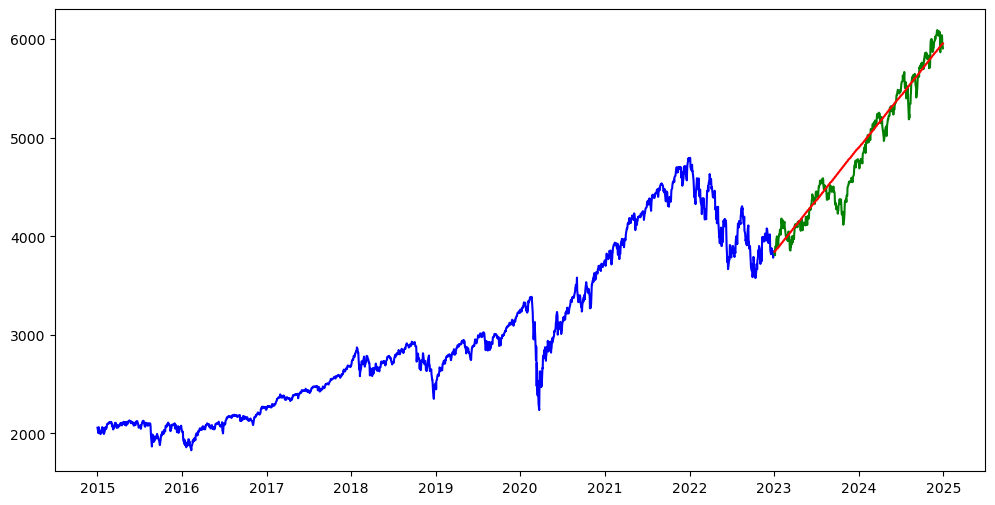

In [40]:
# ARIMA Model - SP500
p_sp500, d_sp500, q_sp500 = 5,2,0
arima_model_sp500 = ARIMA(sp500_train, order=(p_sp500, d_sp500, q_sp500))
arima_model_sp500_fit = arima_model_sp500.fit()

steps_sp500 = len(sp500_test)
arima_forecast_sp500 = arima_model_sp500_fit.get_forecast(steps=steps_sp500)
arima_pred_sp500 = arima_forecast_sp500.predicted_mean
arima_conf_sp500 = arima_forecast_sp500.conf_int(alpha=0.05)

# Align to test values
arima_pred_sp500.index = sp500_test.index
arima_conf_sp500.index = sp500_test.index

#Compute RMSE, MAE, MAPE
arima_rmse_sp500 = np.sqrt(mean_squared_error(sp500_test, arima_pred_sp500))
arima_mae_sp500 = mean_absolute_error(sp500_test, arima_pred_sp500)
arima_mape_sp500 = mean_absolute_percentage_error(sp500_test, arima_pred_sp500)

print("ARIMA performance on S&P 500:")
print(f" RMSE: {arima_rmse_sp500:.2f}")
print(f" MAE: {arima_mae_sp500:.2f}")
print(f" MAPE:{arima_mape_sp500:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(sp500_train.index, sp500_train.values, label='Train', color='blue')
plt.plot(sp500_test.index, sp500_test.values, label='Test', color='green')
plt.plot(arima_pred_sp500.index, arima_pred_sp500.values, label='ARIMA Forecast', color='red')


ARIMA performance on Tesla:
 RMSE: 92.03
 MAE: 74.53
 MAPE:0.36


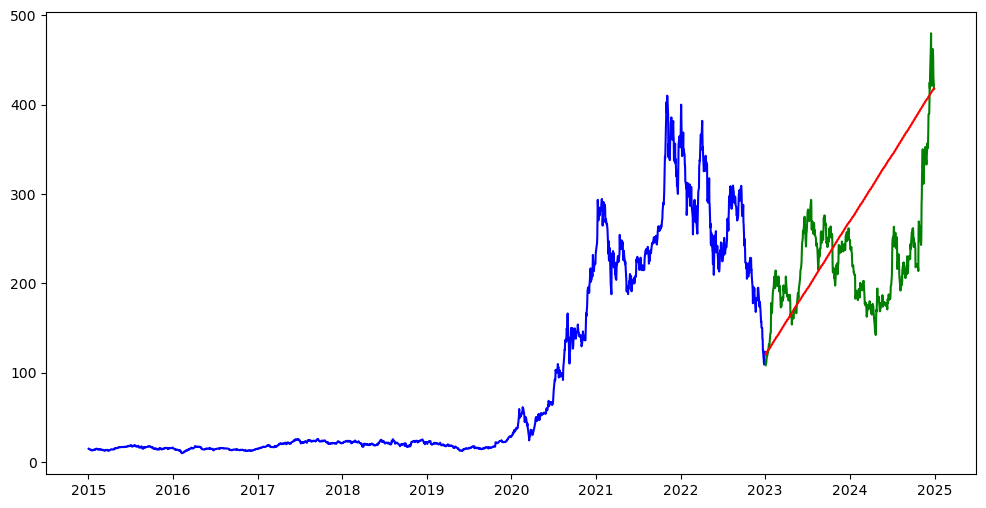

In [41]:
# ARIMA Model - Tesla

p_tesla, d_tesla, q_tesla = 5,2,0
arima_model_tesla = ARIMA(tesla_train, order = (p_tesla, d_tesla, q_tesla))
arima_model_tesla_fit = arima_model_tesla.fit()

steps_tesla = len(tesla_test)
arima_forecast_tesla = arima_model_tesla_fit.get_forecast(steps=steps_tesla)
arima_prediction_tesla = arima_forecast_tesla.predicted_mean
arima_conf_tesla = arima_forecast_tesla.conf_int(alpha=0.05)

# Align to test values
arima_prediction_tesla.index = tesla_test.index
arima_conf_tesla.index = tesla_test.index

#Compute RMSE, MAE, MAPE
arima_rmse_tesla = np.sqrt(mean_squared_error(tesla_test, arima_prediction_tesla))
arima_mae_tesla = mean_absolute_error(tesla_test, arima_prediction_tesla)
arima_mape_tesla = mean_absolute_percentage_error(tesla_test, arima_prediction_tesla)

print("\nARIMA performance on Tesla:")
print(f" RMSE: {arima_rmse_tesla:.2f}")
print(f" MAE: {arima_mae_tesla:.2f}")
print(f" MAPE:{arima_mape_tesla:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(tesla_train.index, tesla_train.values, label='Train', color='blue')   
plt.plot(tesla_test.index, tesla_test.values, label='Test', color='green')
plt.plot(arima_prediction_tesla.index, arima_prediction_tesla.values, label='ARIMA Forecast', color='red')